# Test Notebook for hyothesis tool

### Structure
Explanations for the use of the code cells is displayed as text above them. 
### Executing Code 
To run a cell either press the play button at the top navigation bar or ctrl + Enter when the cell is selected (shown by an outline around the cell), once variables or parameters are changed the cell needs to be run again

### Import all necessary functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('./analysis'))


In [3]:
from analysis import *

Load an  excel sheet as data, based on absolute path, replace the file path "D:\\hypothesis\\..." with path to new sars excel sheet

In [4]:
df = load_data("./datasets/houseprices.csv")

## $\color{red}{\text{All cells above this need to be executed before starting to analyze}}$

## View variables

In [5]:
num_vars, cat_vars = find_variables(df, display=True)

Included numerical variables:

 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Included categorical variables:

 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQua

## Statisitical Tests

### Test Battery  
Define a list of variables of interest, perform appropriate tests for all combinations of variables in this list, generates a file called output.txt in the same directory as the notebook

In [8]:
variables = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
             'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']

In [9]:
output = test_battery(df, variables, save=True)

H-Value: 124.47017255804951, p-Value: 5.92384332509566e-26
          C (all)            FV        RH            RL            RM
C (all) -1.000000  4.568354e-01  1.000000  1.000000e+00  4.584798e-01
FV       0.456835 -1.000000e+00  1.000000  3.808720e-08  1.000000e+00
RH       1.000000  1.000000e+00 -1.000000  6.208239e-02  1.000000e+00
RL       1.000000  3.808720e-08  0.062082 -1.000000e+00  2.409846e-21
RM       0.458480  1.000000e+00  1.000000  2.409846e-21 -1.000000e+00
H-Value: 0.43545200612439194, p-Value: 0.5093257864169044
H-Value: 7.7478929357228346, p-Value: 0.005377524650861256
          Grvl      Pave
Grvl -1.000000  0.005378
Pave  0.005378 -1.000000
H-Value: 7.787676276112513, p-Value: 0.05060978553821257
H-Value: 3.157542547787048, p-Value: 0.36796720835228025
H-Value: 195.12204623514955, p-Value: 4.2023402629388427e-41
          C (all)        FV        RH            RL            RM
C (all) -1.000000  1.000000  1.000000  1.000000e+00  5.136239e-01
FV       1.000000 -1.0

Reg  0.000145  1.000000  0.951424 -1.000000
H-Value: 18.314211563013494, p-Value: 0.0003788557914507167
          Bnk       HLS       Low       Lvl
Bnk -1.000000  0.037038  1.000000  0.000452
HLS  0.037038 -1.000000  0.999877  1.000000
Low  1.000000  0.999877 -1.000000  0.489105
Lvl  0.000452  1.000000  0.489105 -1.000000
H-Value: 75.39494256046912, p-Value: 1.643912992528975e-15
          C (all)        FV   RH            RL            RM
C (all) -1.000000  1.000000  1.0  3.855048e-01  1.000000e+00
FV       1.000000 -1.000000  1.0  4.965065e-02  8.058154e-01
RH       1.000000  1.000000 -1.0  1.000000e+00  1.000000e+00
RL       0.385505  0.049651  1.0 -1.000000e+00  2.572196e-15
RM       1.000000  0.805815  1.0  2.572196e-15 -1.000000e+00
H-Value: 0.25366362265229503, p-Value: 0.6145071406038194
H-Value: 2.405478223484742, p-Value: 0.12091116951722308
H-Value: 26.700058085643178, p-Value: 6.8043906119995145e-06
          IR1  IR2  IR3       Reg
IR1 -1.000000  1.0  1.0  0.000003
IR2  1.

### Individual Tests
Perform individual tests for selected variables

In [14]:
kw_result = kruskal_wallis(df, cat_col='Street', num_col='LotFrontage')

H-Value: 1.5552020266074562, p-Value: 0.21236912096522537


In [48]:
chi2_result = chi_2(df, 'Street', 'Electrical' )

Street      Grvl    Pave
Electrical              
FuseA        1.0    93.0
FuseF        NaN    27.0
FuseP        NaN     3.0
Mix          NaN     1.0
SBrkr        5.0  1329.0
Chi2: 1.1486998040860372, p-Value: 0.8864704604378693, DoF: 4


In [16]:
numerical_correlation(df, "LotFrontage" , "LotArea")

'Test: Spearman Correlation \nSpearman Rho: 0.6496329683785944, p-Value: 6.52618680604516e-145 \n'

## Figures

In [40]:
grouped_box_plot(df, cat_col="SaleCondition", num_cols=['MSSubClass', 'SalePrice', 'LotArea'], points=False)

In [12]:
scatter_correlation_plot(df, var1='LotFrontage', var2='SalePrice')

0.0000


C:\Users\micha\.conda\envs\mt\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



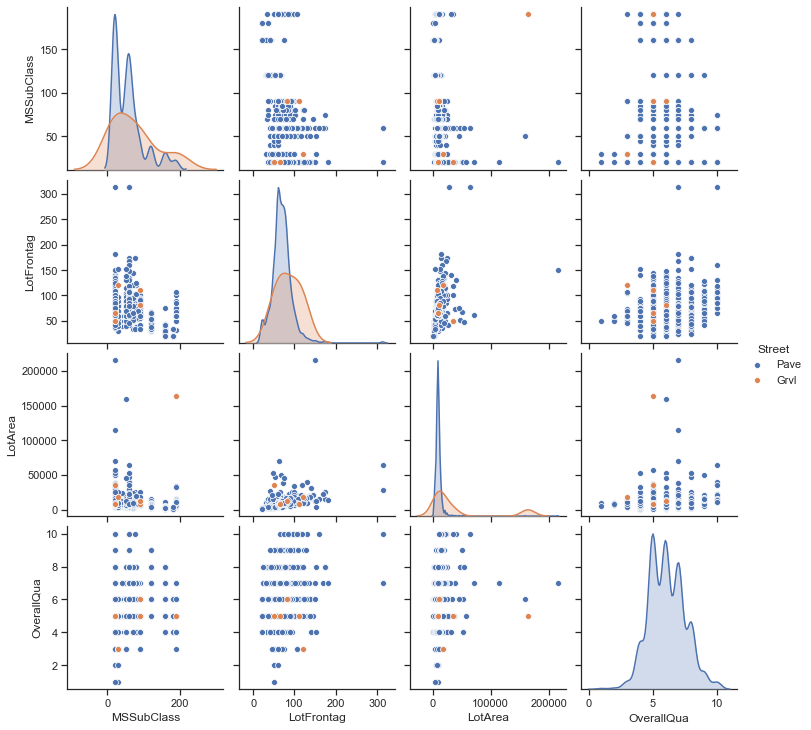

In [13]:
grouped_plot_matrix(df, num_vars=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual'], cat_var="Street")

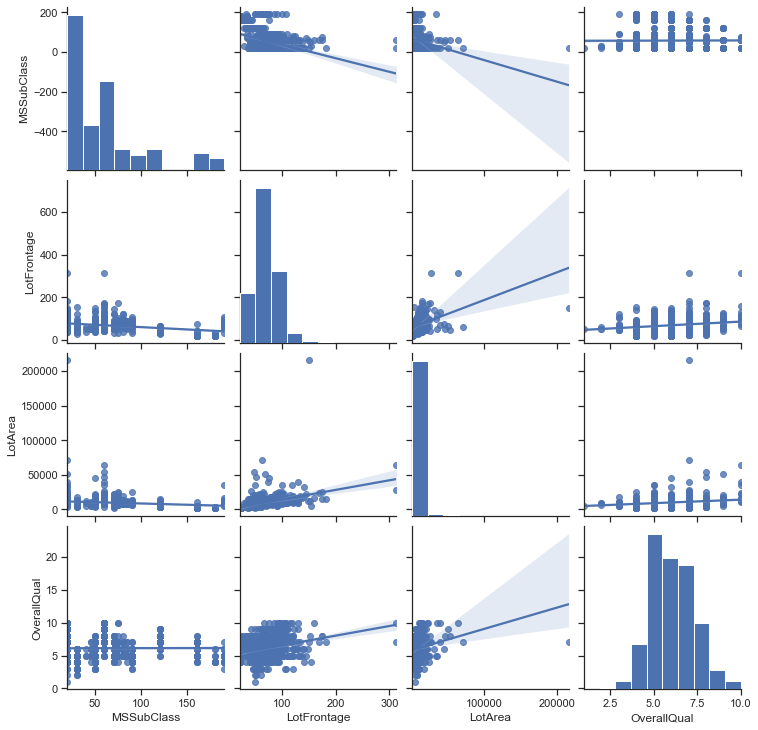

In [14]:
regression_scatter_matrix(df, variables=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual'])

In [20]:
parallel_coordinates_plot(df, variables=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual'], group_var="SalePrice")

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'SalePrice']
MSSubClass
LotFrontage
LotArea
OverallQual


## Train Models

### Define data included in training the models

Show the variables included in computation

In [21]:
num_vars, cat_vars = find_variables(df, display=True)

Included numerical variables:

 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Included categorical variables:

 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQua

In [41]:
excluded_variables = ['Id']

## Cluster

In [43]:
clusters = vbgmm_cluster(df, excluded_variables=excluded_variables, n_clusters=3)

Excluded high cardinality variables: []


In [42]:
hd_cluster = hdbscan_clustering(df, excluded_variables=excluded_variables, min_cluster_size=2, min_samples=5, dims=2)

Excluded high cardinality variables: []
[ 3  3  3 ... -1  3  3]


## Cluster Evaluation

In [45]:
cluster_dfs = extract_clusters(df, clusters)

In [73]:
compare_clusters(df, cluster_dfs)

boolean value of NA is ambiguous
boolean value of NA is ambiguous
boolean value of NA is ambiguous
boolean value of NA is ambiguous
boolean value of NA is ambiguous
boolean value of NA is ambiguous


{'overall_results': [{'variable': 'Neighborhood',
   'p-Value': 3.270076134759963e-149},
  {'variable': 'YearBuilt', 'p-Value': 8.3196921418513255e-140},
  {'variable': 'SalePrice', 'p-Value': 1.854308894993798e-132},
  {'variable': 'OverallQual', 'p-Value': 3.423083920833746e-117},
  {'variable': 'Foundation', 'p-Value': 1.5308852871596308e-115},
  {'variable': 'ExterQual', 'p-Value': 1.4231516137828066e-113},
  {'variable': 'GarageCars', 'p-Value': 1.8702851832401266e-108},
  {'variable': 'FullBath', 'p-Value': 3.731562414421637e-102},
  {'variable': 'KitchenQual', 'p-Value': 1.6063605732789498e-99},
  {'variable': 'GarageArea', 'p-Value': 3.11679004800659e-96},
  {'variable': 'YearRemodAdd', 'p-Value': 2.4388342629312192e-85},
  {'variable': 'Exterior2nd', 'p-Value': 4.0223617044039842e-78},
  {'variable': 'Exterior1st', 'p-Value': 2.6457518633023155e-77},
  {'variable': 'TotalBsmtSF', 'p-Value': 1.3921748766892582e-72},
  {'variable': 'HeatingQC', 'p-Value': 5.199346303440247e-71},

In [44]:
excluded_variables = ['Id']

## Regression
To train a model to predict a numerical variable in the data use one of the models setting the target to the desired variable

Excluded high cardinality variables: []
Creating a random forest regression model
Score: 0.8878271002545398


C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\tree.py:114: UserWarning:

Setting feature_perturbation = "tree_path_dependent" because no background data was given.



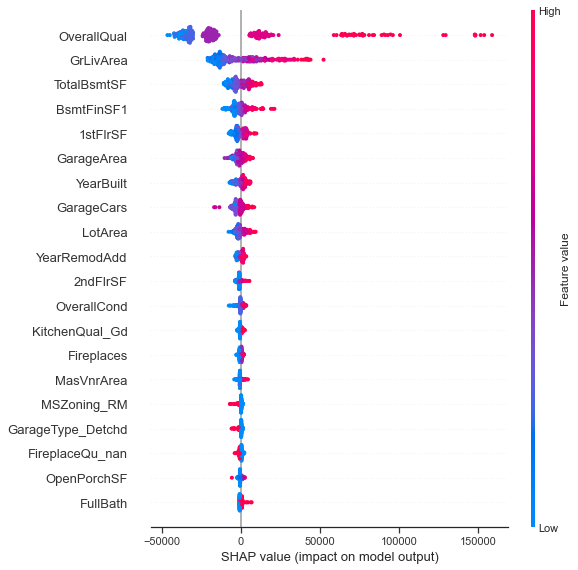

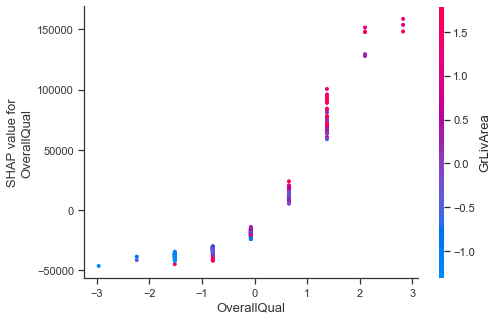

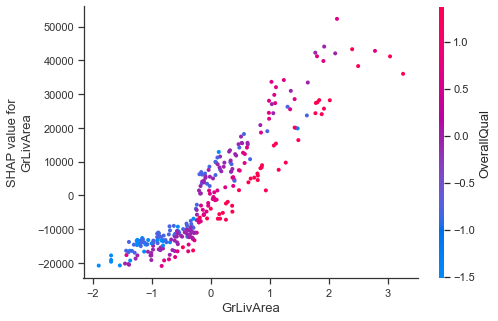

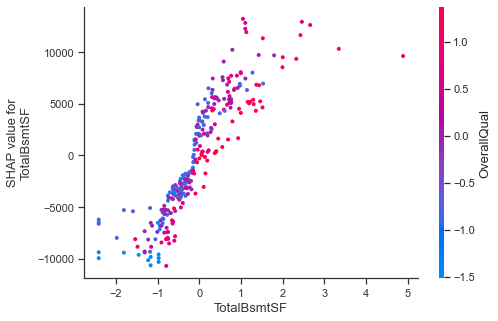

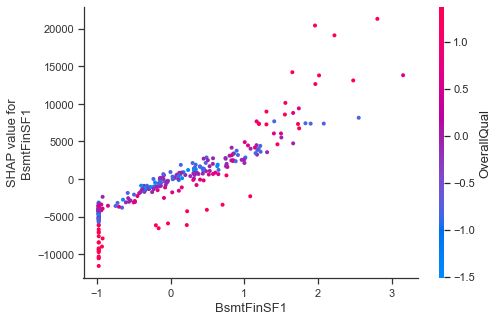

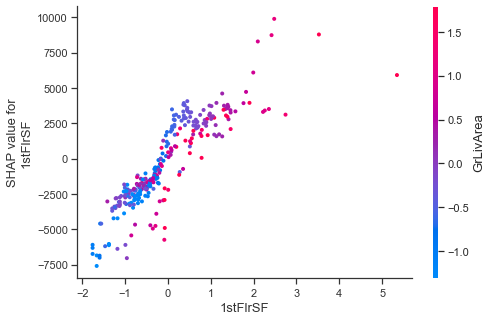

C:\Users\micha\projects\mt\analysis\display\feature_importance.py:58: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



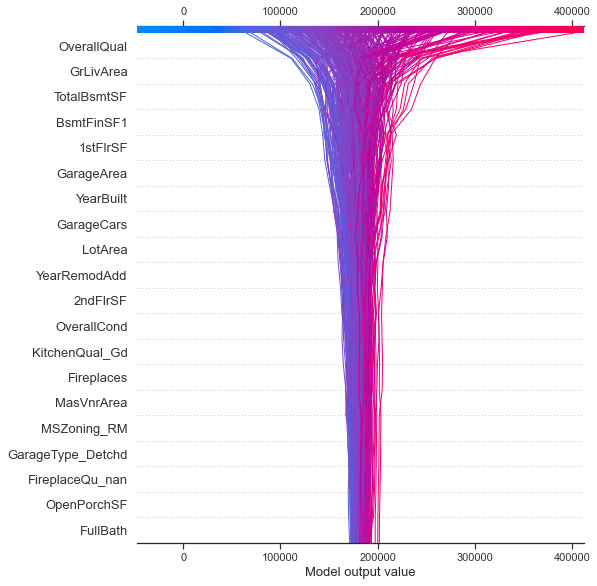

In [37]:
rf_m = random_forest(df, "SalePrice", excluded_variables=excluded_variables, cv=False)

Excluded high cardinality variables: []
Creating a random forest regression model
Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   51.9s finished


{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 500}
Score: 0.8275262158301053


C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\tree.py:114: UserWarning:

Setting feature_perturbation = "tree_path_dependent" because no background data was given.



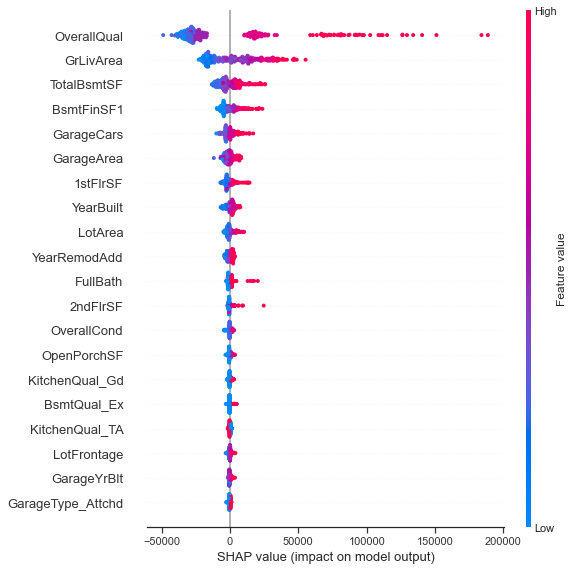

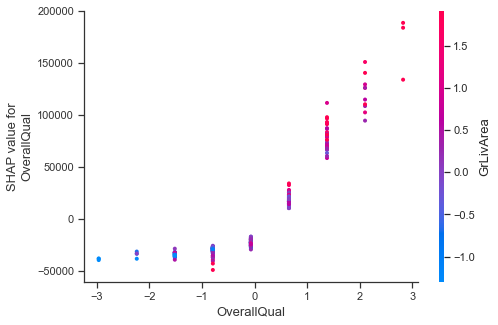

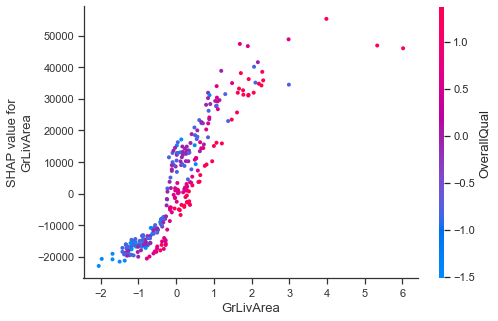

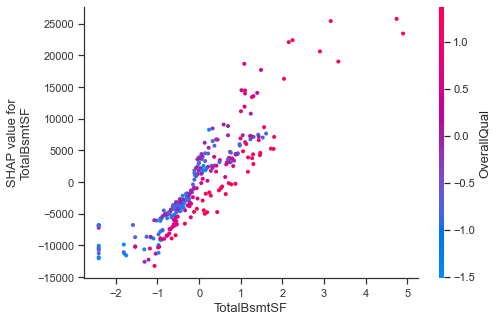

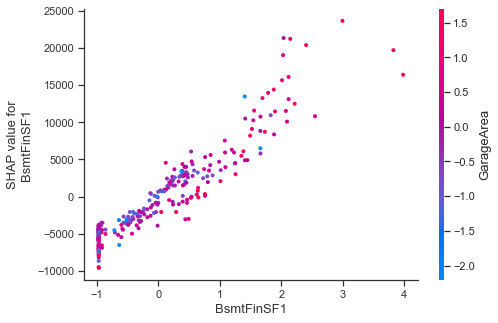

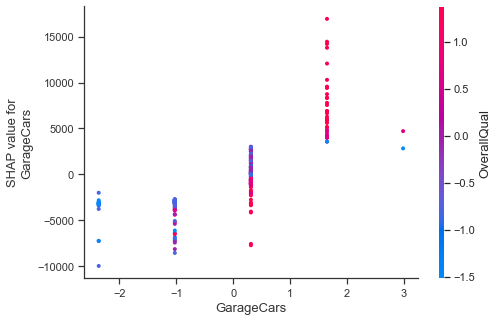

C:\Users\micha\projects\mt\analysis\display\feature_importance.py:58: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



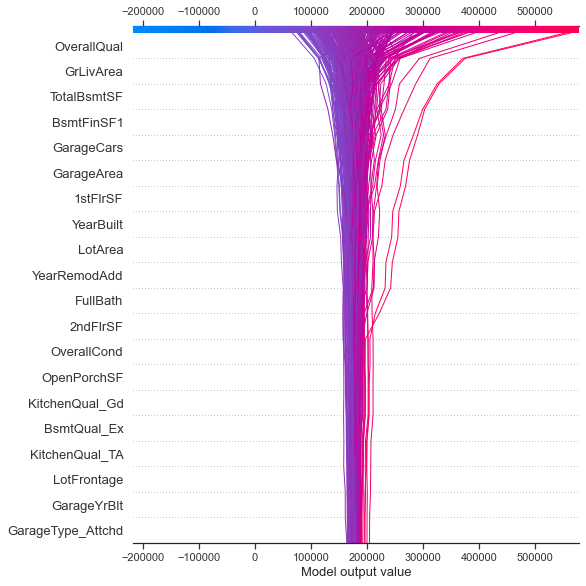

In [38]:
rf_m = random_forest(df, "SalePrice", excluded_variables=excluded_variables, cv=True)

## Multi-Class Classification

In [34]:
svm_m = linear_model(df, "SaleCondition", excluded_variables=excluded_variables, cv=False, shap=True)

[]
Creating a linear multi-class model
Score: 0.8972602739726028


C:\Users\micha\.conda\envs\mt\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning:

Pass labels=['Abnorml', 'Alloca', 'Family', 'Normal', 'Partial'] as keyword args. From version 0.25 passing these as positional arguments will result in an error



C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packa

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packa

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packa

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\kernel.py:554: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

C:\Users\micha\.conda\envs\mt\lib\site-packa

KeyboardInterrupt: 

In [33]:
trained_models = multi_model_predictor(df, "SalePrice", excluded_variables=excluded_variables, cv=False, display=False, shap=False)

[]
Training models
Creating a linear regression model
Score: 0.8480245007322564
Creating a svm regression model
Score: -0.041115615705539676
Creating a random forest regression model
Score: 0.886385211403495
removed:  []
0:	learn: 43179.4123506	total: 16ms	remaining: 1.59s
1:	learn: 34539.5386512	total: 28.9ms	remaining: 1.42s
2:	learn: 30601.6558167	total: 60.9ms	remaining: 1.97s
3:	learn: 26693.8493930	total: 107ms	remaining: 2.57s
4:	learn: 24877.6603986	total: 120ms	remaining: 2.28s
5:	learn: 23857.5328533	total: 155ms	remaining: 2.43s
6:	learn: 22957.0547927	total: 203ms	remaining: 2.69s
7:	learn: 22137.2596313	total: 223ms	remaining: 2.56s
8:	learn: 20430.5152136	total: 251ms	remaining: 2.53s
9:	learn: 18593.2176166	total: 267ms	remaining: 2.4s
10:	learn: 17192.6984732	total: 283ms	remaining: 2.29s
11:	learn: 15632.2411703	total: 322ms	remaining: 2.36s
12:	learn: 15360.2976088	total: 337ms	remaining: 2.25s
13:	learn: 14201.9455391	total: 353ms	remaining: 2.17s
14:	learn: 13567.49